In [2]:
import pandas as pd
import numpy as np
from sktime.forecasting import tbats

In [2]:
temp_df = pd.read_csv("C:\\Users\\Лев\\Projects\\Diploma\\sbp2.csv", sep=';')
temp_df['time'] = pd.to_datetime(temp_df['time'], dayfirst=True)
temp_df = temp_df.sort_values(by=['time'])
temp = pd.DataFrame(pd.date_range(start=temp_df['time'][55215], end=temp_df['time'][0], freq='3 h'), columns=['time'])
temp = temp.set_index('time').join(temp_df.set_index('time'), how='left')
temp = temp['T'].ffill()
temp.index = pd.date_range(start=temp_df['time'][55215], end=temp_df['time'][0], freq='3 h')
temp

2005-03-01 00:00:00   -12.1
2005-03-01 03:00:00   -13.7
2005-03-01 06:00:00   -14.6
2005-03-01 09:00:00   -15.2
2005-03-01 12:00:00   -13.5
                       ... 
2024-02-17 09:00:00     2.3
2024-02-17 12:00:00     2.9
2024-02-17 15:00:00     3.3
2024-02-17 18:00:00     1.0
2024-02-17 21:00:00     0.6
Freq: 3H, Name: T, Length: 55424, dtype: float64

In [3]:
def mae(y_true, y_pred): 
    return np.mean(np.abs(y_true - y_pred))

In [4]:
from sktime.forecasting.model_selection import temporal_train_test_split

temp_train, temp_test = temporal_train_test_split(temp, test_size=2920)

In [5]:
tbats_model = tbats.TBATS(use_box_cox=False, use_trend=False, sp=[8, 2922])
tbats_model.fit(temp_train[-20000:])

TBATS(sp=[8, 2922], use_box_cox=False, use_trend=False)

In [7]:
tbats_model.save("tbats")

<zipfile.ZipFile filename='tbats.zip' mode='r'>

In [5]:
tbats_model = tbats.TBATS.load_from_path("C:\\Users\\Лев\\Projects\\Diploma\\tbats.zip")

In [8]:
tbats_model.get_config()

{'display': 'diagram',
 'print_changed_only': True,
 'check_clone': False,
 'clone_config': True,
 'warnings': 'on',
 'backend:parallel': None,
 'backend:parallel:params': None,
 'remember_data': True}

In [32]:
results = np.array([tbats_model.predict(range(1,25))])

for i in range(358):
    print(round(i / 358, 4))
    tbats_model.update(temp_test[8*i:8*(i+1)], update_params=False)
    results = np.append(results, [tbats_model.predict(range(1,25))], axis=0)

0.0
0.0028
0.0056
0.0084
0.0112
0.014
0.0168
0.0196
0.0223
0.0251
0.0279
0.0307
0.0335
0.0363
0.0391
0.0419
0.0447
0.0475
0.0503
0.0531
0.0559
0.0587
0.0615
0.0642
0.067
0.0698
0.0726
0.0754
0.0782
0.081
0.0838
0.0866
0.0894
0.0922
0.095
0.0978
0.1006
0.1034
0.1061
0.1089
0.1117
0.1145
0.1173
0.1201
0.1229
0.1257
0.1285
0.1313
0.1341
0.1369
0.1397
0.1425
0.1453
0.148
0.1508
0.1536
0.1564
0.1592
0.162
0.1648
0.1676
0.1704
0.1732
0.176
0.1788
0.1816
0.1844
0.1872
0.1899
0.1927
0.1955
0.1983
0.2011
0.2039
0.2067
0.2095
0.2123
0.2151
0.2179
0.2207
0.2235
0.2263
0.2291
0.2318
0.2346
0.2374
0.2402
0.243
0.2458
0.2486
0.2514
0.2542
0.257
0.2598
0.2626
0.2654
0.2682
0.2709
0.2737
0.2765
0.2793
0.2821
0.2849
0.2877
0.2905
0.2933
0.2961
0.2989
0.3017
0.3045
0.3073
0.3101
0.3128
0.3156
0.3184
0.3212
0.324
0.3268
0.3296
0.3324
0.3352
0.338
0.3408
0.3436
0.3464
0.3492
0.352
0.3547
0.3575
0.3603
0.3631
0.3659
0.3687
0.3715
0.3743
0.3771
0.3799
0.3827
0.3855
0.3883
0.3911
0.3939
0.3966
0.3994
0.4022


In [35]:
maes = [mae(results[:,j], temp_test[[8*i + j for i in range(359)]]) for j in range(24)]
maes

C:\Users\Лев\AppData\Local\Temp\ipykernel_5356\418950020.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  maes = [mae(results[:,j], temp_test[[8*i + j for i in range(359)]]) for j in range(24)]


[0.9708574405981865,
 1.4125938930111854,
 1.6511674643026213,
 1.8091018441455995,
 2.115941015209469,
 2.4187307451607527,
 2.660349533759117,
 2.433086472357757,
 2.5729742946279397,
 2.831303612662186,
 2.939538682473418,
 3.0695181529501667,
 3.2445447028027123,
 3.3941807884338875,
 3.474127799151381,
 3.210840001815666,
 3.1731038141452306,
 3.3909349110277733,
 3.4915540280916386,
 3.663069271914444,
 3.792849387128288,
 3.9340455055112633,
 3.8865124716748456,
 3.582076899567254]

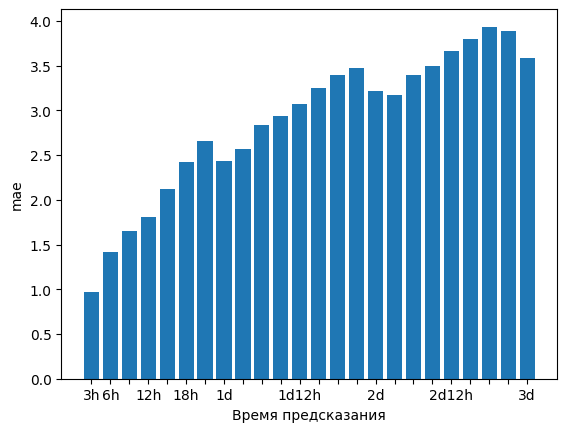

In [36]:
import matplotlib.pyplot as plt

names=['3h','6h','               ','12h','              ','18h','             ','1d','            ','           ','          ','1d12h','         ','        ','       ','2d', ' ','  ','   ','2d12h','    ','     ','      ','3d']
plt.bar(x=names, height=maes)
plt.xlabel("Время предсказания")
plt.ylabel("mae")
plt.show()